In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [12]:
df = pd.read_csv("BOSTON_HOUSING.csv", engine='python')
df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [35]:
df_y = df['MEDV']
df_x = df.drop('MEDV', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (202, 13)
train data Y size :  (202,)
valid data X size :  (152, 13)
valid data Y size :  (152,)
test data X size :  (152, 13)
test data Y size :  (152, 13)


# step 2 모델 생성

In [36]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidScore"] = valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,1,1.000,0.659
1,2,0.987,0.641
2,3,0.940,0.683
3,4,0.902,0.720
4,5,0.872,0.711
5,6,0.854,0.729
6,7,0.862,0.757
7,8,0.869,0.737
8,9,0.828,0.743
9,10,0.800,0.724


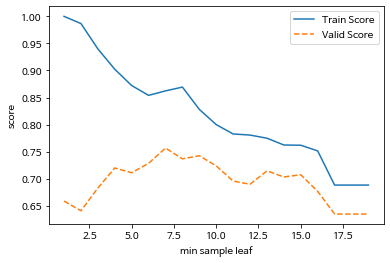

In [37]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()

In [52]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(1,31)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=7, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = valid_score
df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,2,0.862,0.757
1,4,0.862,0.757
2,6,0.862,0.757
3,8,0.862,0.757
4,10,0.862,0.757
5,12,0.862,0.757
6,14,0.862,0.757
7,16,0.861,0.756
8,18,0.857,0.755
9,20,0.847,0.756


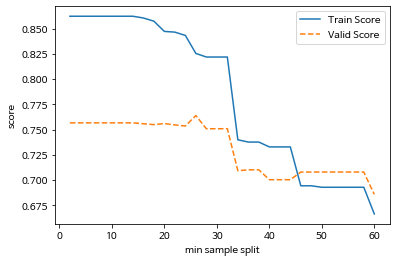

In [39]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()


In [40]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,15)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=7, min_samples_split=26, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.appendf.hist(figsize=(12,9))d(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)


,Depth,TrainScore,ValidScore
0,1,0.448,0.386
1,2,0.665,0.648
2,3,0.738,0.738
3,4,0.775,0.759
4,5,0.816,0.753
5,6,0.822,0.763
6,7,0.825,0.764
7,8,0.825,0.764
8,9,0.825,0.764
9,10,0.825,0.764


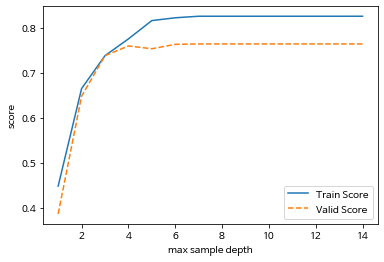

In [41]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label= "Valid Score")
plt.ylabel("score")
plt.xlabel("max sample depth")
plt.legend()

In [43]:
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=7, min_samples_split=26, max_depth=7)
tree_final.fit(df_train_x, df_train_y)
print("score on training set : ", tree_final.score(df_train_x,df_train_y))
print("score on valid set : ", tree_final.score(df_valid_x,df_valid_y))


score on training set :  0.8254438604500058
score on valid set :  0.7638789519372843


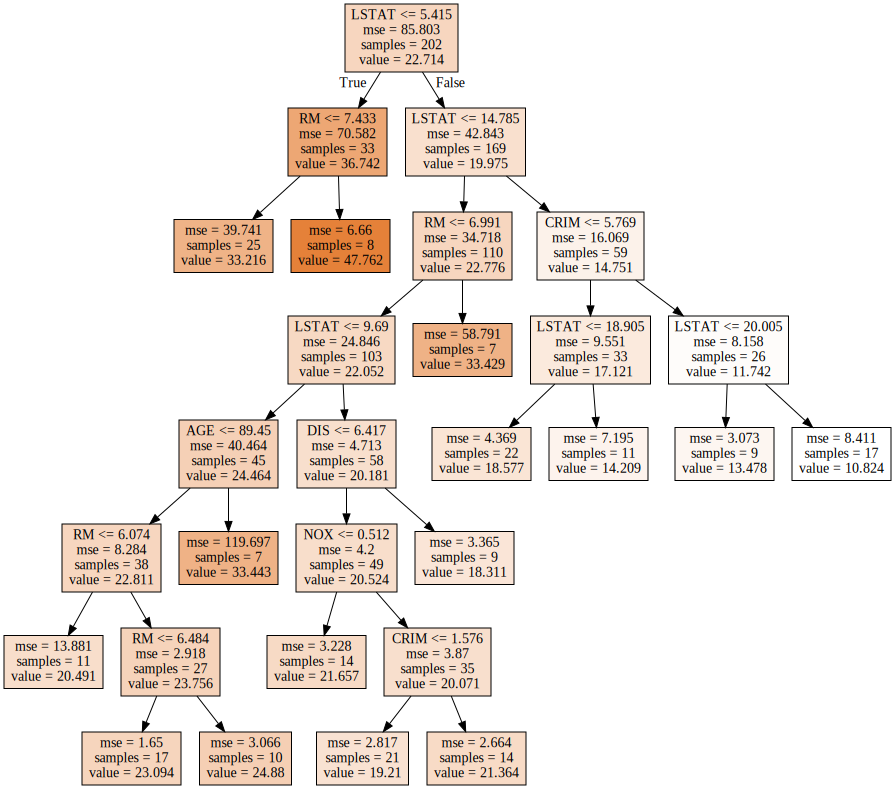

In [44]:
v_feature_name = df_train_x.columns
export_graphviz(tree_final, out_file="tree_final.dot", feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [46]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.761
5,RM,0.156
6,AGE,0.047
0,CRIM,0.032
7,DIS,0.003
4,NOX,0.002
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000
8,RAD,0.000


Text(0, 0.5, '변수')

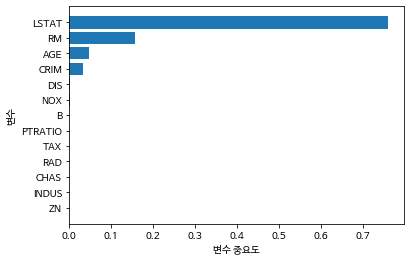

In [47]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

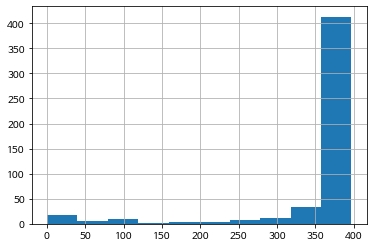

In [14]:
df['B'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd29af7e9d0>,
      dtype=object)

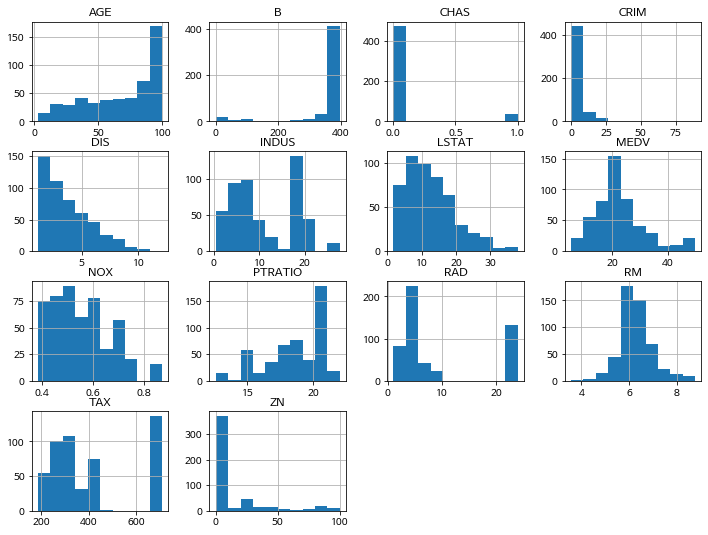

In [15]:
df.hist(figsize=(12,9))

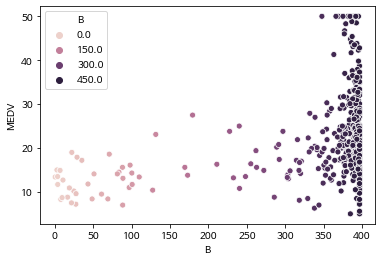

In [19]:
sns.scatterplot(x="B", y="MEDV", hue="B", data=df)

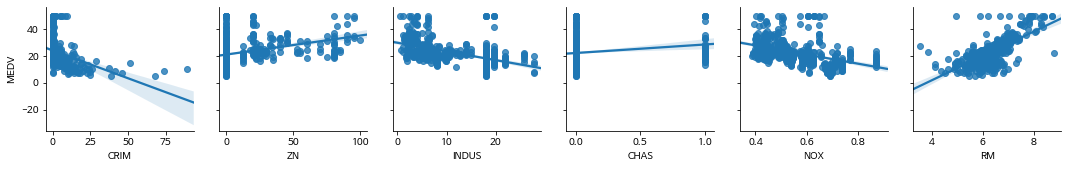

In [50]:
sns.pairplot(df, y_vars="MEDV", x_vars=df_x.columns[:6],kind='reg')

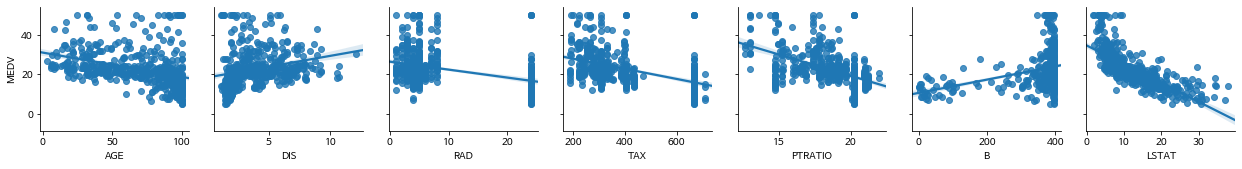

In [51]:
sns.pairplot(df, y_vars="MEDV", x_vars=df_x.columns[6:],kind='reg')


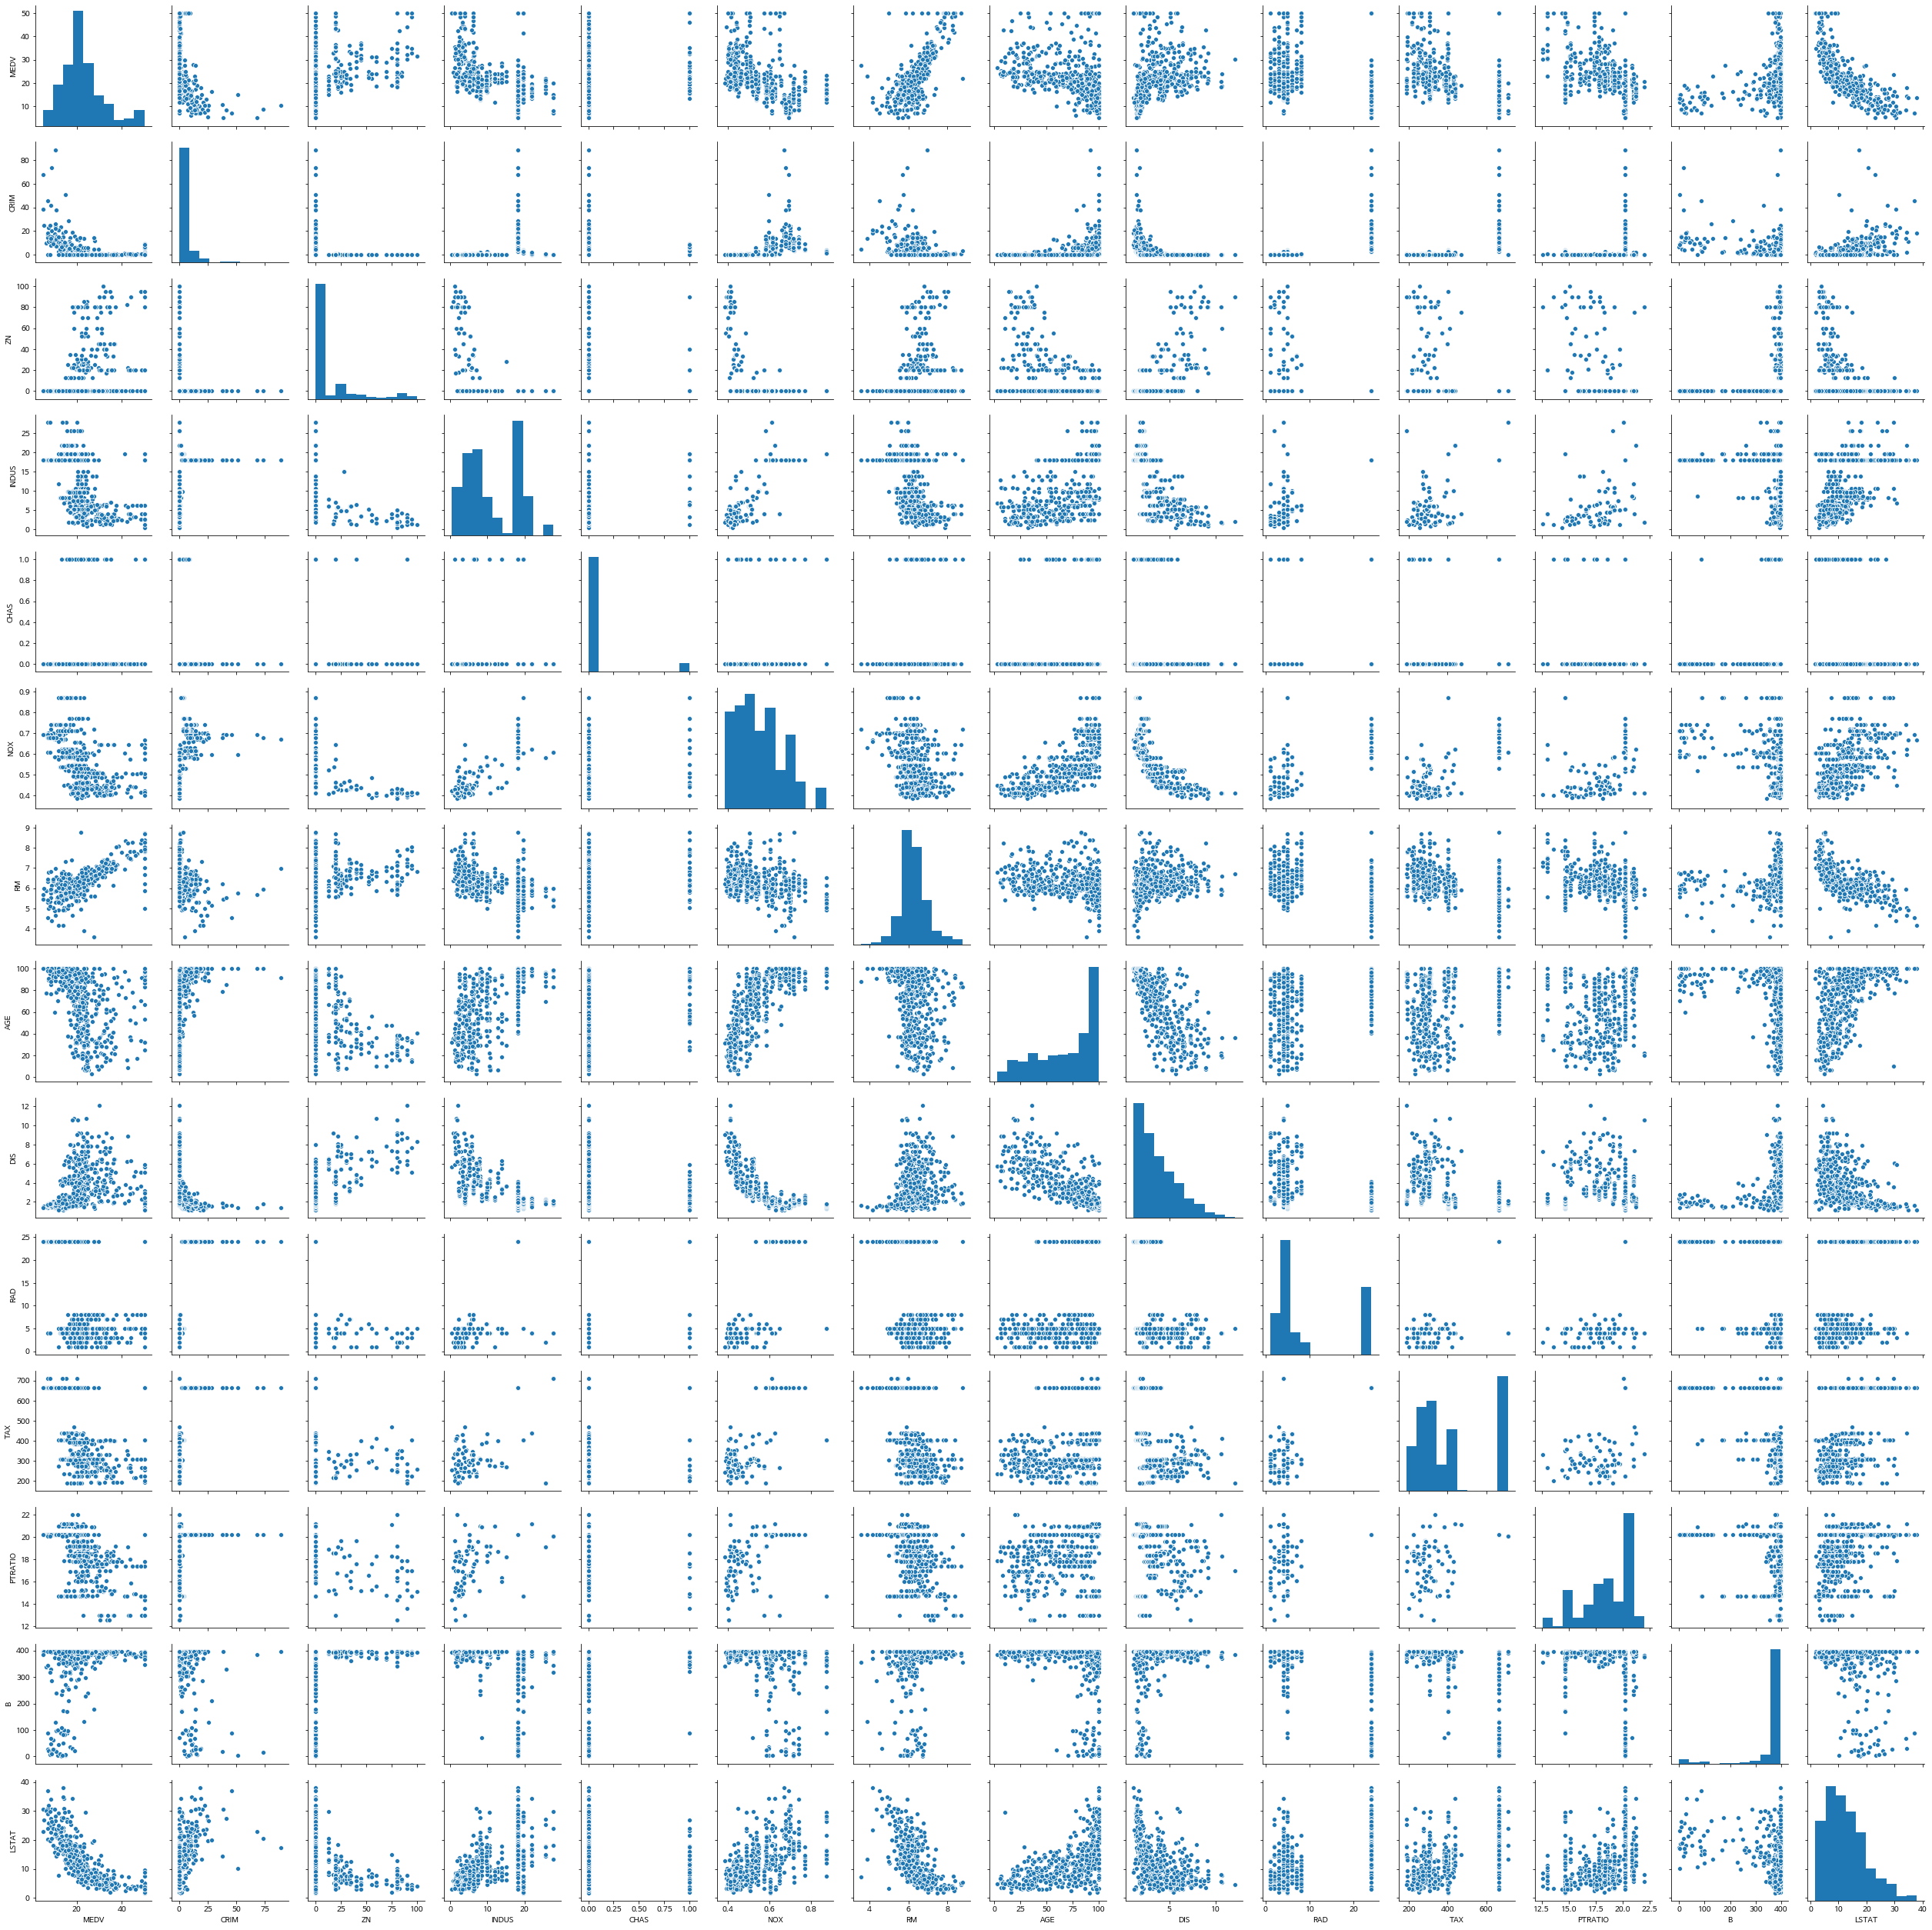

In [34]:
sns.pairplot(df)

In [48]:
df.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489
